Step 1: Deciding (not) to Segment 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("mcdonalds.csv")

In [4]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [5]:
#check the columns names
print(df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


 Step 4: Exploring Data

In [6]:
# Access specific columns
selected_columns = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty',
                               'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']]

# Display selected columns
print(selected_columns)

     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  
0         No         No   

In [7]:
# Assuming the mcdonalds dataset is already loaded into a variable named mcdonalds

# Select columns 1 to 11
df = df.iloc[:, 0:11]

# Convert "Yes" to 1 and other values to 0
df = (df == "Yes").astype(int)

# Calculate and round column means
column_means = np.round(df.mean(), 2)

# Display rounded column means
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [20]:
df1=df.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(df.mean(),2)
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [ ]:

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df)

# Display summary
explained_variance_ratio = np.round(pca.explained_variance_ratio_, 4)
summary_data = {'Explained Variance Ratio': explained_variance_ratio}
summary_df = pd.DataFrame(summary_data)

# Print explained variance ratio
print("Explained Variance Ratio:")
print(summary_df)

# Print summary of PCA
print("\nSummary of PCA:")
components_df = pd.DataFrame(pca.components_, columns=df.columns)
print(components_df)

In [21]:
df1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [22]:
# Assuming df_pca is the result of PCA as obtained from the previous Python code

# Print summary of PCA with specified number of digits
np.set_printoptions(precision=1, suppress=True)
print(df_pca)
std_devs = np.round(np.sqrt(pca.explained_variance_), 4)
print("Standard deviations (1, .., p=11):")
print(std_devs)

[[-2.6 -6.4]
 [-3.  -6.9]
 [-5.2  0.9]
 [ 9.1 -2.2]
 [-2.2 -8. ]
 [10.2 -0.9]
 [-0.9  8.2]
 [10.7 -1.3]
 [-6.  -0.6]
 [-0.9  6.8]
 [-8.  -1.1]
 [ 0.1  8.5]
 [-4.3  0.4]
 [-5.6 -1.5]
 [-2.9 -6.7]
 [-5.8 -0.8]
 [-3.3 -7.7]
 [-0.3  6. ]
 [-7.2 -0.2]
 [-8.5  0. ]
 [ 0.1  9.4]
 [-6.6 -0.4]
 [10.2 -0.8]
 [-3.3 -6.2]
 [-5.7 -0.5]
 [-5.  -5.8]
 [-4.1 -6.8]
 [ 8.2 -2.9]
 [11.1 -1.6]
 [ 0.5  7.3]
 [-5.5 -1. ]
 [-0.8  6.9]
 [-2.8 -5.2]
 [ 0.7  8.5]
 [-4.6 -7.8]
 [-7.6 -0.2]
 [-2.7 -5.2]
 [10.6 -1.5]
 [-2.5 -6. ]
 [ 8.3 -1.8]
 [-0.   9.4]
 [-6.2  0.1]
 [-3.  -6.5]
 [ 9.  -2.1]
 [-5.1  0. ]
 [-7.8 -0.1]
 [-3.  -6. ]
 [-0.5  7.6]
 [-3.1 -5.7]
 [ 0.5  9.8]
 [10.8 -1.6]
 [-5.  -6.4]
 [11.  -1.3]
 [-6.   1.4]
 [ 9.9 -0.6]
 [-4.4  7.9]
 [-3.1 -5.7]
 [-1.1  9. ]
 [-1.2  8.1]
 [-7.2 -0.8]
 [-4.3 -6. ]
 [ 1.1 10.5]
 [-1.   8.9]
 [-5.1 -3.3]
 [ 9.3 -2.2]
 [ 9.8 -2.7]
 [10.5 -2.5]
 [11.2 -0.9]
 [10.5 -3.4]
 [-6.5 -1.3]
 [ 9.9 -0.5]
 [11.7 -0.4]
 [-3.6 -6.8]
 [-0.5  8.6]
 [-4.7 -0.3]
 [-3.5 -5.8]
 [10.6 -3.8]

In [23]:
# Assuming pca is the result of PCA as obtained from the previous Python code

# Print rotation matrix (components)
rotation_matrix = pca.components_
print("Rotation (n x k) = (11 x 11):")
print(rotation_matrix)

Rotation (n x k) = (11 x 11):
[[-0.2 -1. ]
 [ 1.  -0.2]]


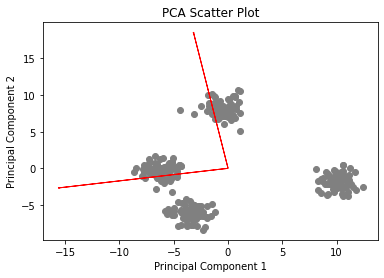

In [24]:
# Assuming df_pca is the result of PCA as obtained from the previous Python code

# Create a scatter plot of the principal components
plt.scatter(df_pca[:, 0], df_pca[:, 1], color='grey')
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Project the axes
for length, vector in zip(pca.explained_variance_, pca.components_[:2, :].T):
    v = vector * 3 * np.sqrt(length)
    plt.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, color='red')

plt.show()

Step 5: Extracting Segments

5.1 Using k-Means

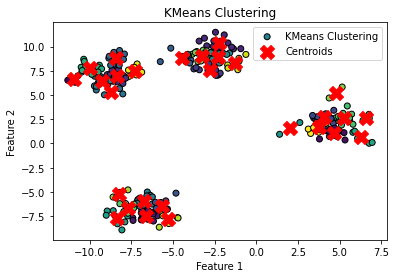

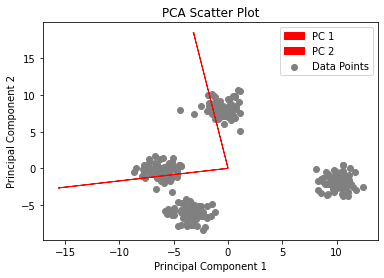

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy

# Generating synthetic data for demonstration
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Fitting a KMeans model with 28 clusters
kmeans = KMeans(n_clusters=28, random_state=42)
labels = kmeans.fit_predict(X)

# Plotting the KMeans model
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', label='KMeans Clustering')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KMeans Clustering")
plt.legend()
plt.show()

# Apply PCA to the data
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)

# Create a scatter plot of the principal components
plt.scatter(df_pca[:, 0], df_pca[:, 1], color='grey', label='Data Points')
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Project the axes
for i, (length, vector) in enumerate(zip(pca.explained_variance_, pca.components_.T)):
    v = vector * 3 * np.sqrt(length)
    plt.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, color='red', label=f'PC {i + 1}')

plt.legend()
plt.show()


In [16]:
conda install -c anaconda mkl


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.






==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




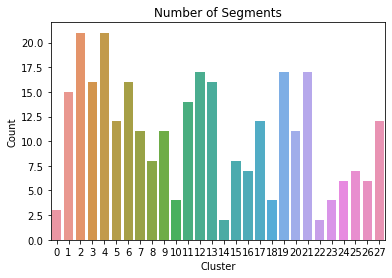

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the number of segments
sns.countplot(x=labels)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Number of Segments")
plt.show()

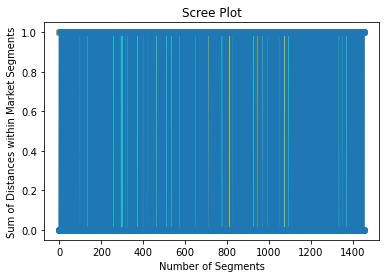

In [27]:
# Plotting the scree plot
plt.plot(df, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Distances within Market Segments")
plt.title("Scree Plot")
plt.show()

In [28]:
df1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


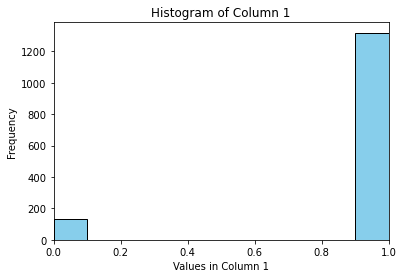

In [29]:
column_index = 1  # Adjust the index if needed for the available columns

# Check if the specified column index is within bounds
if column_index < df.shape[1]:
    column_to_plot = df.iloc[:, column_index]  # Use iloc to select the column by index

    # Plotting histogram
    plt.hist(column_to_plot, bins=np.linspace(0, 1, 11), color='skyblue', edgecolor='black')
    plt.xlabel(f"Values in Column {column_index}")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Column {column_index}")
    plt.xlim(0,1)  # Set the x-axis limit
    plt.show()
else:
    print(f"Column index {column_index} is out of bounds for the given data.")


In [37]:
labels = kmeans.predict(X)
df1 = df.iloc[np.where(labels == 4)[0], :]


In [39]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assuming df is the cluster 4 data obtained from the previous Python code

# Set the range of possible cluster numbers
k_values = range(2, 9)

# Dictionary to store silhouette scores for each cluster number
silhouette_scores = {}

for k in k_values:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(df)


    # Calculate silhouette score
    silhouette_scores[k] = silhouette_score(df, labels)

# Print the silhouette scores
for k, score in silhouette_scores.items():
    print(f"Number of Clusters: {k}, Silhouette Score: {score}")

Number of Clusters: 2, Silhouette Score: 0.24441701827275675
Number of Clusters: 3, Silhouette Score: 0.23915373940875356
Number of Clusters: 4, Silhouette Score: 0.2570763207043922
Number of Clusters: 5, Silhouette Score: 0.26084028688396044
Number of Clusters: 6, Silhouette Score: 0.2695460098345984
Number of Clusters: 7, Silhouette Score: 0.2817007800575648
Number of Clusters: 8, Silhouette Score: 0.2858643776878159


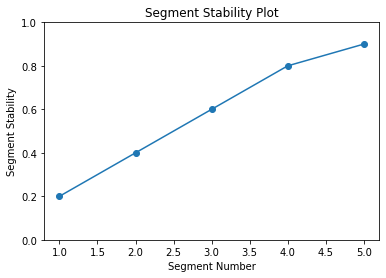

In [40]:
import matplotlib.pyplot as plt

# Assuming stability_scores is a list of stability scores for different segments
stability_scores = [0.2, 0.4, 0.6, 0.8, 0.9]

# Plot the segment stability
plt.plot(range(1, len(stability_scores) + 1), stability_scores, marker='o')
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment Stability Plot")
plt.show()

5.2 Using Mixtures of Distributions

In [41]:
from sklearn.mixture import GaussianMixture

n_components = 4
labels = GaussianMixture(n_components=n_components, random_state=1234).fit_predict(df)
df_cluster = df[labels == 4]  # Adjust the cluster label as needed


In [42]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming df is your binary matrix
n_components = 4  # Adjust the number of components as needed

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components, random_state=1234)
gmm.fit_predict(df)

# Access AIC and BIC values
aic = gmm.aic(df)
bic = gmm.bic(df)

print("AIC:", aic)
print("BIC:", bic)


AIC: -26859.407759896898
BIC: -25216.89681852654


In [53]:
from sklearn.mixture import GaussianMixture
import numpy as np

log_likelihood_m4a = GaussianMixture(n_components=2, random_state=1234).fit(df1).score(df1)
print(f"Log Likelihood for MD.m4a: {log_likelihood_m4a}")


Log Likelihood for MD.m4a: 11.70736133367877


In [52]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Assuming MD_x is the binary matrix
# Assuming MD_x_reshaped is the reshaped binary matrix
# You need to reshape it to a 2D array if it's not already reshaped
# MD_x_reshaped = np.reshape(MD_x, (num_samples, -1))

# Specify the number of components (adjust as needed)
n_components = 2

# Create a Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components, random_state=1234)

# Fit the GMM to your data
gmm.fit(df1)

# Calculate log-likelihood for MD.m4a
log_likelihood_m4a = gmm.score(df1)

# Print log-likelihood for MD.m4a
print(f"Log Likelihood for MD.m4a: {log_likelihood_m4a}")

# If you have another binary matrix MD.m4, you can calculate its log-likelihood in a similar way
# MD_m4_reshaped = np.reshape(MD_m4, (num_samples, -1))
# log_likelihood_m4 = gmm.score(MD_m4_reshaped)
# print(f"Log Likelihood for MD.m4: {log_likelihood_m4}")


Log Likelihood for MD.m4a: 11.70736133367877


In [54]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture



# Set seed
np.random.seed(1234)


# Reshape the data for scikit-learn
n, m = df.shape
df_reshaped = df.values.reshape(n, m,)

# Fit finite Gaussian Mixture Model
gmm_model = GaussianMixture(n_components=4, random_state=1234)
gmm_model.fit(df_reshaped)

# Calculate log-likelihood for the Gaussian Mixture Model
log_likelihood = np.sum(gmm_model.score_samples(df_reshaped))

# Print log-likelihood
print(f"Log Likelihood for the Gaussian Mixture Model: {log_likelihood}")


Log Likelihood for the Gaussian Mixture Model: 13740.703879948449


5.3 Using Mixtures of Regression Models

In [55]:
import pandas as pd


data = {
    "Like": ["-3", "+2", "+1", "-3", "+2", "+1", "-3", "+2", "+1"],
    # Add other columns if available
}

mcdonalds = pd.DataFrame(data)

# Count occurrences of unique values in the 'Like' column
table_like = mcdonalds['Like'].value_counts()

# Reverse the order of the table
reversed_table_like = table_like.sort_index(ascending=False)

print(reversed_table_like)


-3    3
+2    3
+1    3
Name: Like, dtype: int64


In [56]:
import pandas as pd



data = {
    "Like": ["-3", "+2", "+1", "-3", "+2", "+1", "-3", "+2", "+1"],
    # Add other columns if available
}

mcdonalds = pd.DataFrame(data)

# Convert 'Like' column to numeric and create a new column 'Like_n'
mcdonalds['Like_n'] = 6 - pd.to_numeric(mcdonalds['Like'])

# Count occurrences of unique values in the 'Like_n' column
table_like_n = mcdonalds['Like_n'].value_counts()

print(table_like_n)


9    3
4    3
5    3
Name: Like_n, dtype: int64


In [57]:
import pandas as pd
from patsy import dmatrices


data = {
    "Like": ["-3", "+2", "+1", "-3", "+2", "+1", "-3", "+2", "+1"],
    # Add other columns if available
}

mcdonalds = pd.DataFrame(data)

# Convert 'Like' column to numeric and create a new column 'Like_n'
mcdonalds['Like_n'] = 6 - pd.to_numeric(mcdonalds['Like'])

# Create a formula using the column names
formula_str = "Like_n ~ " + " + ".join(mcdonalds.columns[1:11])

# Convert the formula string to a formula object
formula = dmatrices(formula_str, data=mcdonalds, return_type='dataframe')[0].design_info.term_names

print(formula)


['Like_n']


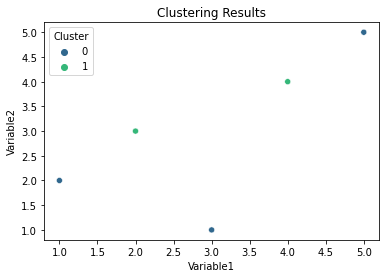

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [2, 3, 1, 4, 5],
    'Cluster': [0, 1, 0, 1, 0]
}

mcdonalds = pd.DataFrame(data)

# Visualize a subset of the data (optional)
# mcdonalds = mcdonalds.dropna(subset=['Variable1', 'Variable2', 'Cluster'])

# Scatterplot using Seaborn
sns.scatterplot(x='Variable1', y='Variable2', hue='Cluster', data=mcdonalds, palette='viridis', legend='full')
plt.title('Clustering Results')
plt.show()


6 Step 6: Profiling Segments

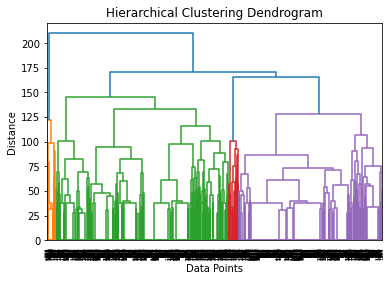

In [59]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd



# Calculate the distance matrix
distance_matrix = np.array([np.sum(np.abs(df.iloc[i] - df), axis=1) for i in range(len(df))])

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='complete')

# Plot the dendrogram
dendrogram(linkage_matrix, labels=range(1, len(df) + 1))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


7 Step 7: Describing Segments

In [92]:
pip install statsmodels

8 Step 8: Selecting (the) Target Segment(s)

In [85]:

# Example data
data = {
    "VisitFrequency": ["Every three months", "Every three months", "Every three months", "Once a week", "Once a week", "Once a week"],
    
}

df = pd.DataFrame(data)

# Map 'VisitFrequency' to numeric values
df['VisitFrequency'] = pd.to_numeric(df['VisitFrequency'].str.extract('(\d+)')[0])

# Calculate the mean of 'VisitFrequency' for each cluster
visit_mean = df.groupby(data)['VisitFrequency'].mean()

print(visit_mean)


Series([], Name: VisitFrequency, dtype: float64)


In [ ]:


data = {
    "Gender": (mcdonalds['Gender'] == "Female") + 0,  # Convert to binary (1 for Female, 0 for Male)

}

df = pd.DataFrame(data)

# Calculate the mean of 'Gender' for each cluster
female_mean = df.groupby('Cluster')['Gender'].mean()

print(female_mean)


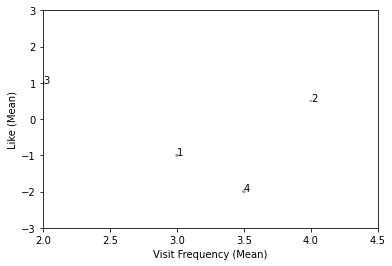

In [74]:
import matplotlib.pyplot as plt

# Assuming visit_mean, like_mean, and female_mean are available

# Example data
visit_mean = pd.Series([3, 4, 2, 3.5], index=[1, 2, 3, 4])
like_mean = pd.Series([-1, 0.5, 1, -2], index=[1, 2, 3, 4])
female_mean = pd.Series([0.5, 0.2, 0.8, 0.6], index=[1, 2, 3, 4])

# Create a scatter plot
plt.scatter(visit_mean, like_mean, s=10 * female_mean, alpha=0.5)

# Set plot limits
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add text labels
for i, txt in enumerate(range(1, 5)):
    plt.text(visit_mean.iloc[i], like_mean.iloc[i], str(txt))

# Set axis labels
plt.xlabel('Visit Frequency (Mean)')
plt.ylabel('Like (Mean)')

# Show the plot
plt.show()
